# Test 3: Plotting
Test my `plotting` function in `plotting.py`.

## 1. Import Packages

In [1]:
# The Python Standard Library

# The Third-Party Library
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, LogLocator)

# My Packages
from myhep.plotting import plotting_basic, plotting

# increase figure showing resolution
%config InlineBackend.figure_format = 'retina'

## 2. Load Datasets

In [2]:
# load .csv into pd.DataFrame()
df_1 = pd.read_csv('./data/data_1.csv')
df_2 = pd.read_csv('./data/data_2.csv')

# load .npz into np.array()
weight = np.load('./data/weight.npz')

In [3]:
df_1.head()

,a,b,selected
0,0,1,0
1,0,2,1
2,1,2,2
3,2,3,3
4,3,3,4


In [4]:
df_2.head()

,a,b,selected
0,1,0,0
1,2,0,1
2,2,1,2
3,9,1,3
4,9,1,4


In [5]:
weight

In [6]:
weight.files

['weight_1', 'weight_2', 'weight_all2']

In [7]:
weight['weight_1']

array([2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2])

In [8]:
for i, w in enumerate(weight.files):
    print(f'{i}, {w}: {weight[w]}')
    print('-'*80)

0, weight_1: [2 2 2 2 2 2 3 2 2 2 2 2 4 2 2 2 2 2 2]
--------------------------------------------------------------------------------
1, weight_2: [2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 6 2 2 2]
--------------------------------------------------------------------------------
2, weight_all2: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
--------------------------------------------------------------------------------


In [9]:
w = [weight['weight_1'], weight['weight_all2']]
w

[array([2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])]

In [10]:
ww = [i for i in weight.files]
ww

['weight_1', 'weight_2', 'weight_all2']

In [11]:
ww = [weight[i] for i in weight.files]
ww

[array([2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2]),
 array([2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])]

## 3. Plot Histogram

In [12]:
# define global variables
binning = np.linspace(0, 10, 11)
color = ['red', 'blue']
label = ['data 1', 'data 2']
text = [r'$\sqrt{s} = 13$ TeV', r'$m_{Z^\prime} = 1500$ GeV', 'text 3']
text_xy=(0.1, 0.9)

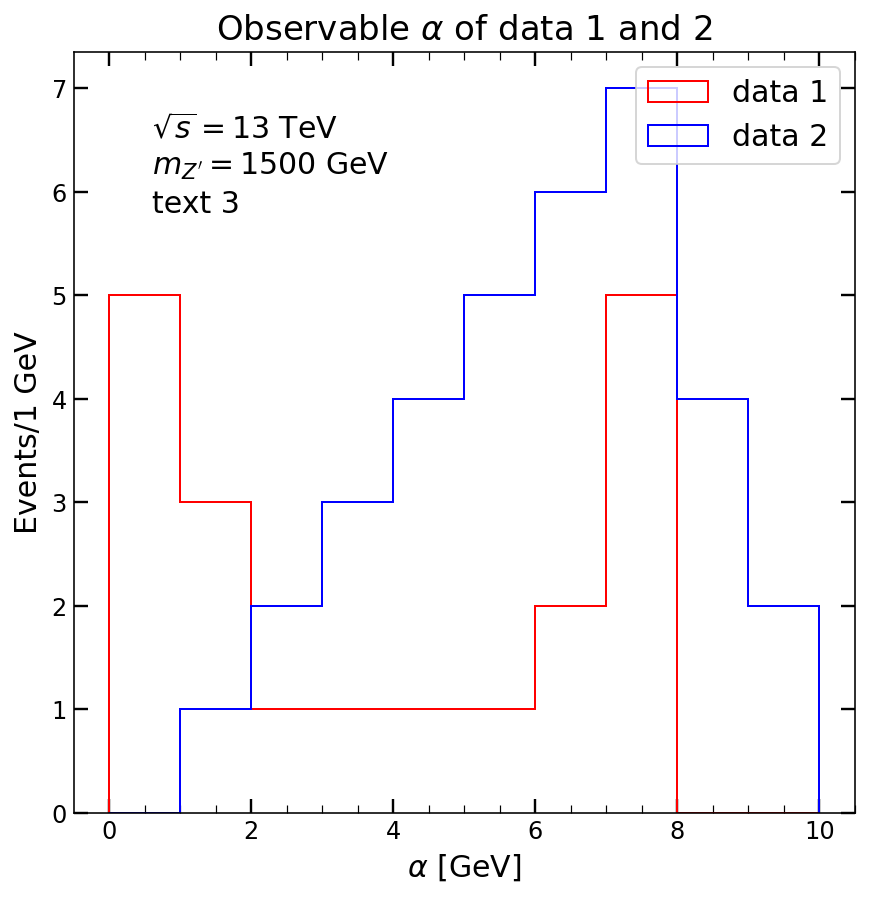

(array([[5, 3, 1, 1, 1, 1, 2, 5, 0, 0],
        [0, 1, 2, 3, 4, 5, 6, 7, 4, 2]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))

In [13]:
# plot (4-1) in test_2_histograms.ipynb
plotting('a', [df_1, df_2], binning=binning, data_color=color, data_label=label,
         set_title=r'Observable $\alpha$ of data 1 and 2',
         xlabel=r'$\alpha$ [GeV]', ylabel='Events/1 GeV',
         text=text, text_xy=text_xy,
         savefig='./figures_test_3/fig_4-1.pdf')

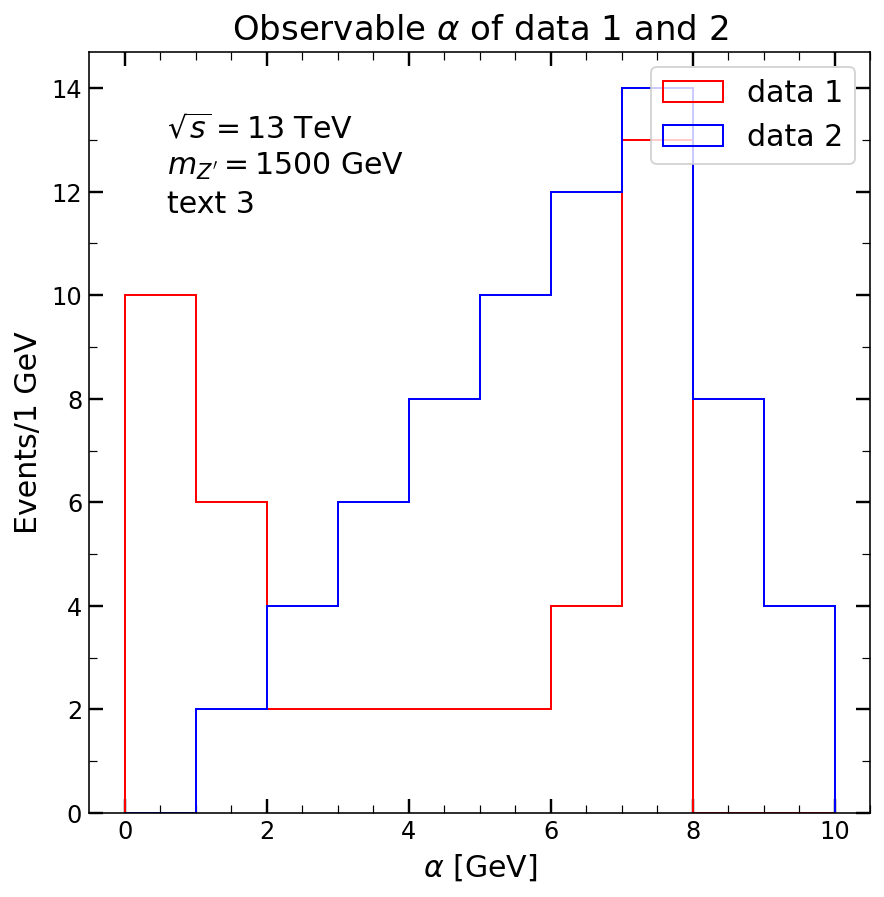

In [14]:
# plot (4-2) in test_2_histograms.ipynb
w = [weight['weight_1'], weight['weight_all2']]
s = [df_1['selected'].to_numpy(), df_2['selected'].to_numpy()]
hist, bins = plotting('a', [df_1, df_2], binning, color, label,
                      weight=w, selected=s,
                      set_title=r'Observable $\alpha$ of data 1 and 2',
                      xlabel=r'$\alpha$ [GeV]', ylabel='Events/1 GeV',
                      text=text, text_xy=text_xy,
                      savefig='./figures_test_3/fig_4-2.pdf')
# savefig='./figures_test_3/fig_4-2.svg' cool!

In [15]:
print(np.sum(hist, axis=1))
hist

[41 68]


array([[10,  6,  2,  2,  2,  2,  4, 13,  0,  0],
       [ 0,  2,  4,  6,  8, 10, 12, 14,  8,  4]])

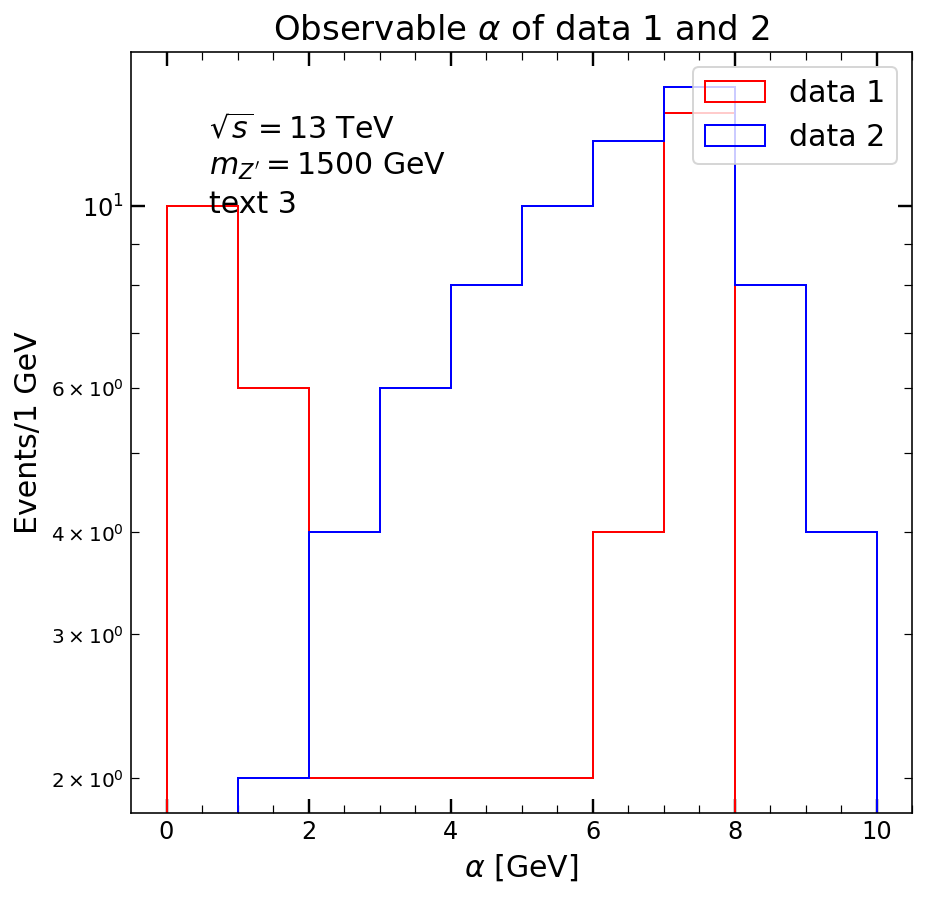

In [16]:
# plot (4-2) with log y-axis scale in test_2_histograms.ipynb
w = [weight['weight_1'], weight['weight_all2']]
s = [df_1['selected'].to_numpy(), df_2['selected'].to_numpy()]
hist, bins = plotting('a', [df_1, df_2], binning, color, label,
                      weight=w, selected=s,
                      set_title=r'Observable $\alpha$ of data 1 and 2',
                      yscale='log',
                      xlabel=r'$\alpha$ [GeV]', ylabel='Events/1 GeV',
                      text=text, text_xy=text_xy,
                      savefig='./figures_test_3/fig_4-2_y_log.pdf')

In [17]:
print(np.sum(hist, axis=1))
hist

[41 68]


array([[10,  6,  2,  2,  2,  2,  4, 13,  0,  0],
       [ 0,  2,  4,  6,  8, 10, 12, 14,  8,  4]])

##### Conclusion: Everything is excellent!!

## 4. Test

In [18]:
df_1['a'].head()

0    0
1    0
2    1
3    2
4    3
Name: a, dtype: int64

In [19]:
df_1['a'].to_numpy()

array([0, 0, 1, 2, 3, 4, 7, 1, 1, 7, 7, 7, 7, 5, 6, 6, 0, 0, 0])

In [20]:
df_1['a'] - df_1['a'].to_numpy()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
Name: a, dtype: int64

##### Conclusion: `pd.DataFrame` is so powerful!